# Data-Project US-Census Data Cleaning
## Completed on : 10th April 2023

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 

glob is a module that is used to read multiple files.

The glob module, which is short for global, is a function that’s used to search for files that match a specific file pattern or name. 

It can be used to search CSV files and for text in files. 

In [37]:
df = pd.read_csv('./US_Census Data Cleaning/states0.csv') # default sep is ','
df.columns = ['Id', 'State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'] # # modify column names 
print(df.head())

   Id       State  TotalPop             Hispanic                White  \
0   0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1   1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2   2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3   3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4   4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296.35860306644    2341093M_2489527F  
1   1.058682

save the file with new column names

to_csv() is a method of DataFrame class that is used to save the DataFrame to a csv file, it will modify the original file and save it

In [38]:
path = r'./US_Census Data Cleaning'
files = glob.glob(path + '/states*.csv') 
print("List of Files", files) 

List of Files ['./US_Census Data Cleaning\\states0.csv', './US_Census Data Cleaning\\states1.csv', './US_Census Data Cleaning\\states2.csv', './US_Census Data Cleaning\\states3.csv', './US_Census Data Cleaning\\states4.csv', './US_Census Data Cleaning\\states5.csv', './US_Census Data Cleaning\\states6.csv', './US_Census Data Cleaning\\states7.csv', './US_Census Data Cleaning\\states8.csv', './US_Census Data Cleaning\\states9.csv']


r means raw string , it is used to ignore the special characters in the string

'*' means any characters that follow the pattern 'states' e.g. states0.csv, states1.csv, states2.csv, etc.

print the list of files that match the pattern

In [39]:
df_list = []
for filename in files:
    df = pd.read_csv(filename, index_col=None, header=0) # index_col=None means not to use the first column as index, header=0 means use the first row as column names
    df.columns = ['Id', 'State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'] # modify column names
    df_list.append(df) # append the DataFrame to the list, the list will contain all the DataFrames that match the pattern
    df_merge = pd.concat(df_list, axis=0, ignore_index=True) # concat() is a method of pandas that is used to concatenate DataFrames, axis=0 means concatenate along the rows, ignore_index=True means ignore the original index and create a new index
    df_merge = df_merge.drop(['Id'], axis=1) # drop() is a method of DataFrame class that is used to drop a column or a row, axis=1 means drop a column
    df_merge = df_merge.reset_index(drop=True) # reset_index() is a method of DataFrame class that is used to reset the index, drop=True means drop the original index and create a new index
    df_merge.to_csv('./US_Census_Data_Merged_Solution.csv', header=True) # save the merged DataFrame to a csv file , index=False means not to save the index column(True by default), header=True means save the column names

print(df_list) # print the list of DataFrames

[   Id       State  TotalPop             Hispanic                White  \
0   0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1   1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2   2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3   3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4   4  California  38421464  37.291874687968054%   40.21578881677474%   
5   5    Colorado   5278906   20.78438003220608%   69.89557165861504%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   
5   3.546376811594201%   0.5738325281803548%   2.661996779388082%   

   

In [40]:
print(df_merge) # print the merged DataFrame 

                   State  TotalPop             Hispanic                White  \
0                Alabama   4830620  3.7516156462584975%     61.878656462585%   
1                 Alaska    733375   5.909580838323351%  60.910179640718574%   
2                Arizona   6641928  29.565921052631502%  57.120000000000026%   
3               Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4             California  38421464  37.291874687968054%   40.21578881677474%   
5               Colorado   5278906   20.78438003220608%   69.89557165861504%   
6               Colorado   5278906   20.78438003220608%   69.89557165861504%   
7            Connecticut   3593222  15.604830917874388%    67.6770531400966%   
8               Delaware    926454    8.82476635514019%   64.63271028037383%   
9   District of Columbia    647484   9.165921787709499%  33.103910614525134%   
10               Florida  19645772    21.3385426653884%   59.08374880153398%   
11               Georgia  10006693   8.4

 Check the dataTypes and Columns of the Merge DataFrame :

In [41]:
print(df_merge.columns) # print the column names of the merged DataFrame

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [42]:
print(df_merge.dtypes) # print the dataTypes of the merged DataFrame

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


In [43]:
print(df_merge.head()) # print the first 5 rows of the merged DataFrame

        State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296.35860306644    2341093M_2489527F  
1   1.0586826347305378%  $70354.7439

The data type of a column in a DataFrame can be determined by pandas automatically, based on the data in that column. 

If pandas is unable to infer the data type of a column, it will assign the "object" data type as a fallback.

Here are some reasons why your DataFrame may have "object" data types:

1. The column may contain a mix of different data types, such as strings, integers, and floats. When pandas encounters such a column, it assigns the "object" data type.

2. The column may contain missing or null values. In this case, pandas assigns the "object" data type as a placeholder until it can determine the correct data type.

3. The data in the column may be in a format that pandas does not recognize. For example, if a column contains dates in a non-standard format, 
pandas may not be able to infer the data type and will assign "object" as a fallback.

To address this issue, you can use the astype() method to convert the data type of a column to a more appropriate type. 

For example, if a column contains only numeric data, you can convert it to the "float" data type using df['column_name'] = df['column_name'].astype(float).

In [44]:
# Split the GenderPop Column into two columns , Gender(Male) and Gender(Female)
# str.split() is a method of string class that is used to split a string into a list, expand=True means expand the split strings into separate columns

df_merge[['Gender(Male)','Gender(Female)']] = df_merge.GenderPop.str.split("_",expand=True) 
print(df_merge.head()) # print the first 5 rows of the merged DataFrame

        State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop Gender(Male)  \
0  0.03435374149659865%  $43296.35860306644    2341093M_2489527F     2341093M   
1   1.05

In [45]:
df_dropped = df_merge.drop(['GenderPop'], axis=1, inplace=False) # drop the GenderPop column, inplace=False means not to modify the original DataFrame
print(df_dropped.head()) # print the first 5 rows of the merged DataFrame

        State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income Gender(Male) Gender(Female)  
0  0.03435374149659865%  $43296.35860306644     2341093M       2489527F  
1   1.0586826347305378

In [46]:
df_dropped['Gender(Male)'] = df_dropped['Gender(Male)'].str.replace('M', '') # str.replace() is a method of string class that is used to replace a substring with another substring
df_dropped['Gender(Female)'] = df_dropped['Gender(Female)'].str.replace('F', '')
print(df_dropped.head()) # print the first 5 rows of the merged DataFrame

        State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income Gender(Male) Gender(Female)  
0  0.03435374149659865%  $43296.35860306644      2341093        2489527  
1   1.0586826347305378

In [47]:
print(df_dropped[['Gender(Female)','Gender(Male)']])  # have NaN values or missing values, can't convert to int data type due to NaN values, missing values are in Gender(Female) Column only so,

# fill the NaN values by subtracting the Gender(Male) Column values from the TotalPop Column values and then convert the data type of the columns to int

   Gender(Female) Gender(Male)
0         2489527      2341093
1          349215       384160
2         3342840      3299088
3         1506295      1451913
4        19334329     19087135
5         2630239      2648667
6         2630239      2648667
7         1841615      1751607
8          478041       448413
9          340810       306674
10       10045763      9600009
11        5123362      4883331
12        5123362      4883331
13         696428       709871
14         806083       810464
15        6556862      6316899
16        3333382      3235263
17        1558931      1534595
18        1558931      1534595
19        1453125      1439862
20        2233145      2164208
21        2364097      2261156
22         679019       650081
23                     2872643
24                     2872643
25        3455936      3249650
26        5038598      4861973
27        2727005      2692166
28        1536358      1451723
29        3081445      2964003
30        3081445      2964003
31      

Convert the Gender(Male) Column to int data type as it doesn't have any NaN values , otherwise it will throw an error on subtracting Object data type from int data type

In [48]:
df_dropped['Gender(Male)'] = df_dropped[['Gender(Male)']].astype('int64') 

# convert the data type of the column to int, # assigning the converted column to the original column , 
# without assigning it to the original column, the changes will not be reflected in the original DataFrame.

print(df_dropped.dtypes)

State             object
TotalPop           int64
Hispanic          object
White             object
Black             object
Native            object
Asian             object
Pacific           object
Income            object
Gender(Male)       int64
Gender(Female)    object
dtype: object


In [49]:
df_dropped.replace('missing_value', np.nan, inplace=True) # replace the NaN values with 0, inplace=True means modify the original DataFrame

In [50]:
# fill the NaN/''(completed blanked) values in the Women column for each state 
for state in df_dropped['State'].unique(): # unique() is a method of DataFrame class that is used to get the unique values of a column, here we are getting the unique values of the State column then iterating over them
    men_pop = df_dropped.loc[df_dropped['State'] == state, 'Gender(Male)'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the gender(male) column from the selected rows and then converting it to a list and then selecting the first element of the list
    # selecting the values[0] first and only element of the list
    total_pop = df_dropped.loc[df_dropped['State'] == state, 'TotalPop'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the TotalPop column from the selected rows and then converting it to a list and then selecting the first element of the list
    # calculate the women value in the women column for the current state with the calculated women value.
    women_pop = total_pop - men_pop
    df_dropped.loc[(df_dropped['State'] == state) & (df_dropped['Gender(Female)'] == ''), 'Gender(Female)'] = women_pop # fill the Nan value in women's column where it is completely blank and the state is equal to the current state 


In [51]:
print(df_dropped[['Gender(Female)','Gender(Male)']])

   Gender(Female)  Gender(Male)
0         2489527       2341093
1          349215        384160
2         3342840       3299088
3         1506295       1451913
4        19334329      19087135
5         2630239       2648667
6         2630239       2648667
7         1841615       1751607
8          478041        448413
9          340810        306674
10       10045763       9600009
11        5123362       4883331
12        5123362       4883331
13         696428        709871
14         806083        810464
15        6556862       6316899
16        3333382       3235263
17        1558931       1534595
18        1558931       1534595
19        1453125       1439862
20        2233145       2164208
21        2364097       2261156
22         679019        650081
23        3057895       2872643
24        3057895       2872643
25        3455936       3249650
26        5038598       4861973
27        2727005       2692166
28        1536358       1451723
29        3081445       2964003
30      

convert both columns into numerical data types

In [52]:

print(df_dropped.dtypes)

State             object
TotalPop           int64
Hispanic          object
White             object
Black             object
Native            object
Asian             object
Pacific           object
Income            object
Gender(Male)       int64
Gender(Female)    object
dtype: object


In [53]:
df_dropped[['Gender(Female)','Gender(Male)']] = df_dropped[['Gender(Female)','Gender(Male)']].astype('int64') # convert the data type of the columns to int
print(df_dropped.dtypes)

State             object
TotalPop           int64
Hispanic          object
White             object
Black             object
Native            object
Asian             object
Pacific           object
Income            object
Gender(Male)       int64
Gender(Female)     int64
dtype: object


drop the duplicates from the DataFrame

In [54]:
df_dropped.drop_duplicates(inplace=True) # drop the duplicates from the DataFrame, inplace=True means modify the original DataFrame
print(df_dropped) # print df

                   State  TotalPop             Hispanic                White  \
0                Alabama   4830620  3.7516156462584975%     61.878656462585%   
1                 Alaska    733375   5.909580838323351%  60.910179640718574%   
2                Arizona   6641928  29.565921052631502%  57.120000000000026%   
3               Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4             California  38421464  37.291874687968054%   40.21578881677474%   
5               Colorado   5278906   20.78438003220608%   69.89557165861504%   
7            Connecticut   3593222  15.604830917874388%    67.6770531400966%   
8               Delaware    926454    8.82476635514019%   64.63271028037383%   
9   District of Columbia    647484   9.165921787709499%  33.103910614525134%   
10               Florida  19645772    21.3385426653884%   59.08374880153398%   
11               Georgia  10006693   8.418242207460397%   54.28630556974962%   
13                Hawaii   1406299   9.1

Making scatter plots of the data to explore the relationships between variables

Scatter plots are useful for exploring relationships between two numeric variables.

The relationship between two variables can be positive, negative, or no relationship at all.

A duplicate column/row in dataframe in scatter plot will cause the plot to be distorted, so we need to drop the duplicates from the DataFrame ( We already Dropped them above)

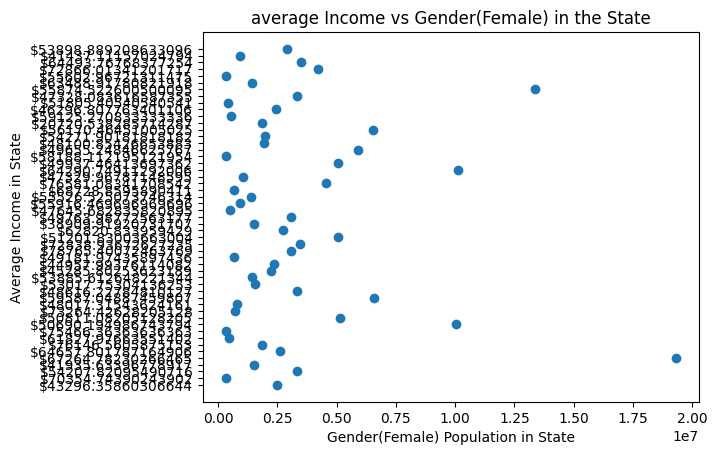

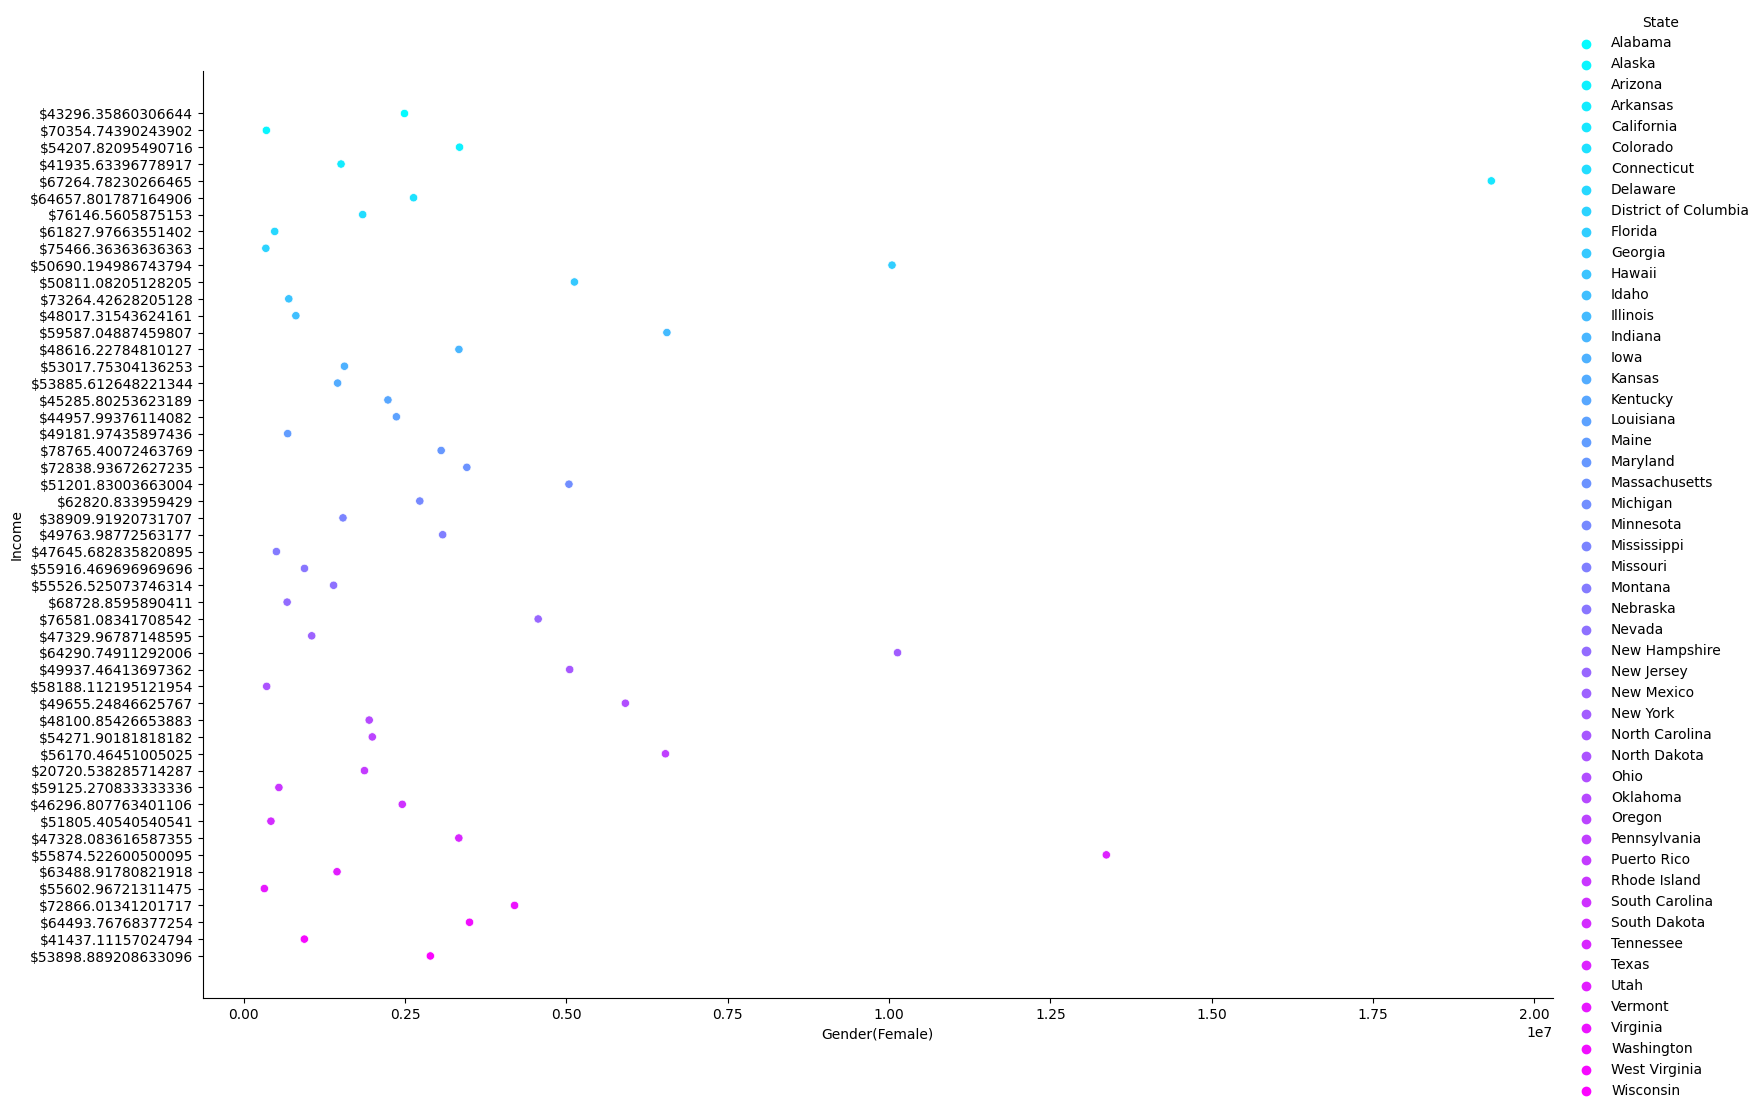

In [55]:
# Scatter Plot of average Income vs Gender(Female) in the State

%matplotlib inline
x = df_dropped['Gender(Female)']
y = df_dropped['Income']

plt.scatter(x,y)

# Add labels and title
plt.xlabel('Gender(Female) Population in State')
plt.ylabel('Average Income in State')
plt.title('average Income vs Gender(Female) in the State')
# plt.savefig('matplotlib_averageIncomevsGender(Female).png')

plt.show()

sns.relplot(df_dropped, x='Gender(Female)', y='Income',height=10, kind='scatter', palette='cool', hue='State', aspect=1.6)
# plt.savefig('seaborn_averageIncomevsGender(Female).png')
plt.show()


Print Histograms of The Races in the State 

Histograms are useful for exploring the distribution of a single numeric variable.

The x-axis represents the values of the variable, and the y-axis represents the frequency of those values.

The shape of the histogram can give you a sense of the distribution of the variable.

The more spread out the values are, the more spread out the histogram will be.

The more concentrated the values are, the more narrow the histogram will be.

In [56]:
print(df_dropped.columns)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Gender(Male)', 'Gender(Female)'],
      dtype='object')


In [57]:
df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']] = df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']].apply(lambda x: x.str.replace('%', '')) 

# replace the % sign from the values of the columns\
# str.replace() is a method of string class that is used to replace a substring with another substring

print(df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']]) # print the columns of the DataFrame

              Hispanic               White               Black  \
0   3.7516156462584975     61.878656462585   31.25297619047618   
1    5.909580838323351  60.910179640718574  2.8485029940119775   
2   29.565921052631502  57.120000000000026  3.8509868421052658   
3    6.215474452554738   71.13781021897813  18.968759124087573   
4   37.291874687968054   40.21578881677474   5.677396405391911   
5    20.78438003220608   69.89557165861504   3.546376811594201   
7   15.604830917874388    67.6770531400966   10.34806763285027   
8     8.82476635514019   64.63271028037383  20.743925233644834   
9    9.165921787709499  33.103910614525134   51.77653631284915   
10    21.3385426653884   59.08374880153398  15.165675934803444   
11   8.418242207460397   54.28630556974962   32.08829841594277   
13   9.186708860759486  25.032278481012657   2.052848101265823   
14  11.505369127516781    83.1362416107383  0.5667785234899323   
15  15.601733547351516   60.85980738362764  17.108410914927717   
16   6.536

In [58]:
df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']] = df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']].astype('float64') 

# convert the data type of the columns to float

print(df_dropped.dtypes) # print the data types of the columns of the DataFrame

State              object
TotalPop            int64
Hispanic          float64
White             float64
Black             float64
Native            float64
Asian             float64
Pacific           float64
Income             object
Gender(Male)        int64
Gender(Female)      int64
dtype: object


In [59]:
# fill the NaN values in the race columns by subtracting all 
for state in df_dropped['State'].unique(): # unique() is a method of DataFrame class that is used to get the unique values of a column, here we are getting the unique values of the State column then iterating over them
    hispanic_pop = df_dropped.loc[df_dropped['State'] == state, 'Hispanic'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the Hispanic column from the selected rows and then converting it to a list and then selecting the first element of the list
    white_pop = df_dropped.loc[df_dropped['State'] == state, 'White'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the White column from the selected rows and then converting it to a list and then selecting the first element of the list
    black_pop = df_dropped.loc[df_dropped['State'] == state, 'Black'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the Black column from the selected rows and then converting it to a list and then selecting the first element of the list
    native_pop = df_dropped.loc[df_dropped['State'] == state, 'Native'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the Native column from the selected rows and then converting it to a list and then selecting the first element of the list
    asian_pop = df_dropped.loc[df_dropped['State'] == state, 'Asian'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the Asian column from the selected rows and then converting it to a list and then selecting the first element of the list

    pacific_pop = 100 - hispanic_pop - white_pop - black_pop - native_pop - asian_pop # calculate the pacific value in the pacific column for the current state with the calculated pacific value.
    df_dropped.loc[(df_dropped['State'] == state) & (df_dropped['Pacific'].isnull()), 'Pacific'] = pacific_pop # fill the Nan value in pacific's column where it is completely blank and the state is equal to the current state

print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']]) # print the columns of the DataFrame

------------------------------------------------------------------------------------------------------------------------------------------------------------
     Hispanic      White      Black     Native      Asian   Pacific
0    3.751616  61.878656  31.252976   0.453231   1.050255  0.034354
1    5.909581  60.910180   2.848503  16.391018   5.450299  1.058683
2   29.565921  57.120000   3.850987   4.355066   2.876579  0.167632
3    6.215474  71.137810  18.968759   0.522920   1.142336  0.146861
4   37.291875  40.215789   5.677396   0.405292  13.052234  0.351410
5   20.784380  69.895572   3.546377   0.573833   2.661997  2.537842
7   15.604831  67.677053  10.348068   0.126208   4.021981  0.018599
8    8.824766  64.632710  20.743925   0.259813   3.268692  2.270093
9    9.165922  33.103911  51.776536   0.200559   3.383240  0.029609
10  21.338543  59.083749  15.165676   0.210451   2.283174  0.051510
11   8.418242  54.286306  32.088298   0.187583   3.097649  0.046602
13   9.186709  25.032278   

In [93]:
sns.set()
sns.set_palette("Paired", 12)

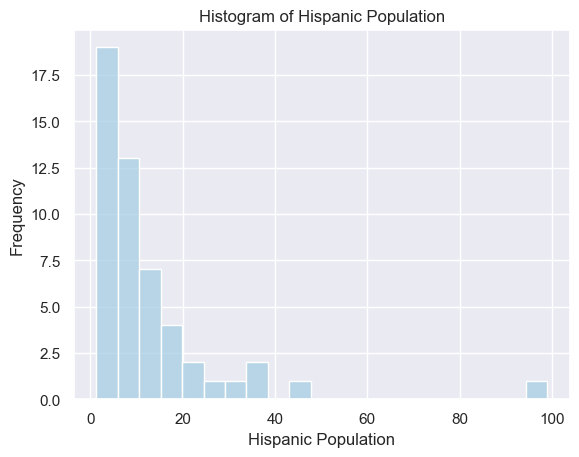

In [94]:
# Histogram of Hispanic Population
sns.histplot(df_dropped, x='Hispanic',)
plt.xlabel('Hispanic Population')
plt.ylabel('Frequency')
plt.title('Histogram of Hispanic Population')
# plt.savefig('matplotlib_HistogramofHispanicPopulation.png')
plt.show()

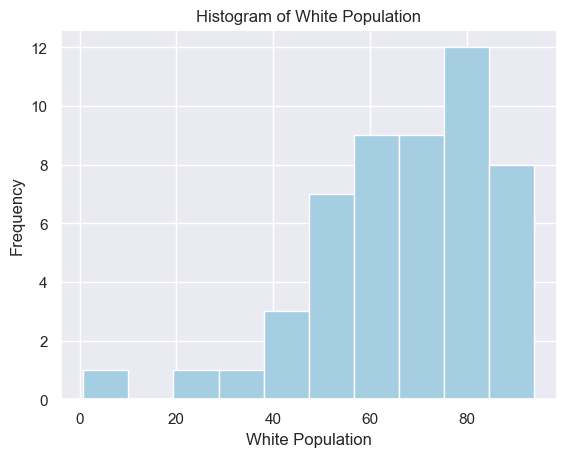

In [87]:
# Histogram of White Population
plt.hist(df_dropped['White'])
plt.xlabel('White Population')
plt.ylabel('Frequency')
plt.title('Histogram of White Population')
# plt.savefig('matplotlib_HistogramofWhitePopulation.png')
plt.show()

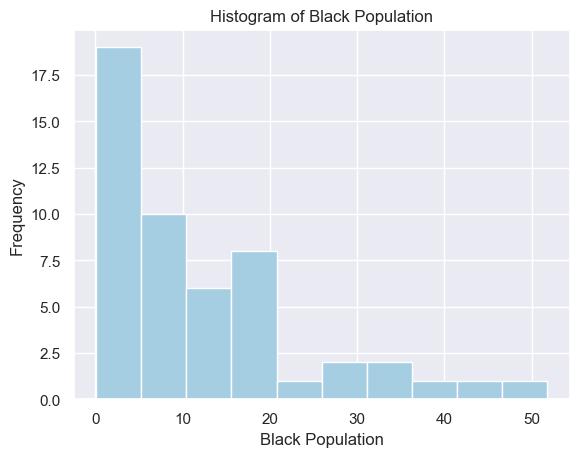

In [95]:
# Histogram of Black Population
plt.hist(df_dropped['Black'])
plt.xlabel('Black Population')
plt.ylabel('Frequency')
plt.title('Histogram of Black Population')
# plt.savefig('matplotlib_HistogramofBlackPopulation.png')
plt.show()

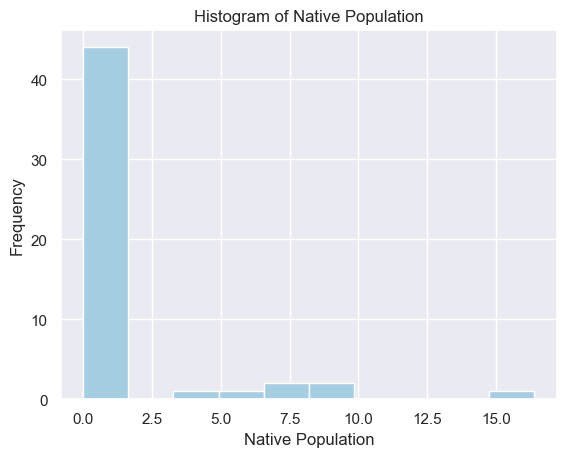

In [96]:
# Histogram of Native Population
plt.hist(df_dropped['Native'])
plt.xlabel('Native Population')
plt.ylabel('Frequency')
plt.title('Histogram of Native Population')
# plt.savefig('matplotlib_HistogramofNativePopulation.png')
plt.show()

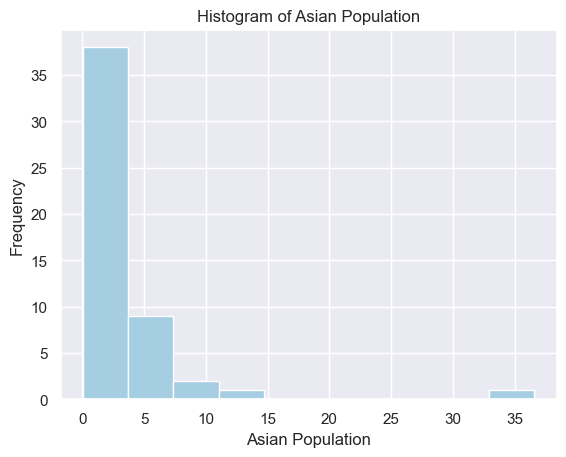

In [97]:
# Histogram of Asian Population
plt.hist(df_dropped['Asian'])
plt.xlabel('Asian Population')
plt.ylabel('Frequency')
plt.title('Histogram of Asian Population')
# plt.savefig('matplotlib_HistogramofAsianPopulation.png')
plt.show()

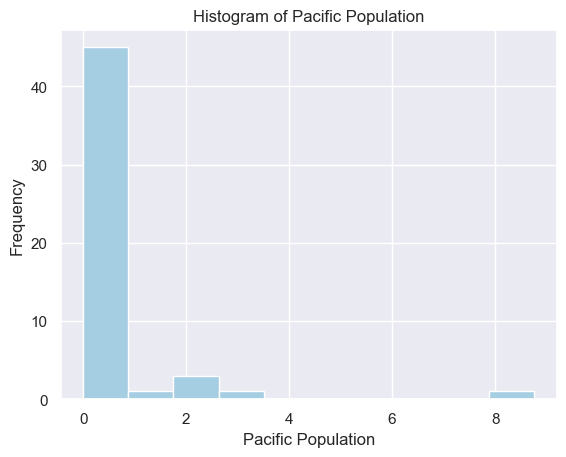

In [98]:
# Histogram of Pacific Population
plt.hist(df_dropped['Pacific'])
plt.xlabel('Pacific Population')
plt.ylabel('Frequency')
plt.title('Histogram of Pacific Population')
# plt.savefig('matplotlib_HistogramofPacificPopulation.png')
plt.show()